
## data_month2
#### ตู้เย็น | 2 ประตูขนาด 17 คิว |                                      


In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random

d = 31
time_a = pd.date_range('2016-11-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-11-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
####### set databases to empty #########
query_empty = """truncate table data_month2.refrigurator""" 
c.execute(query_empty)
print "data_month2.refrigurator are Empty!!! \n"

query = "SELECT watt FROM collected_info.6_refrigurator WHERE no >= '%s' AND no <= '%s'; "% (0,1297)
df = pd.read_sql(query, conn)

i = 0
j = 0
while (j <= (5760*d)-1): 
    c.execute("INSERT INTO data_month2.refrigurator (Timestamp, watt) VALUES ( %s, %s)",(time_b[j],df.watt[i]))
    conn.commit()
    i+=1
    j+=1

    if (i >= len(df)):
        i = 0    
        print ".",
print '\nDONE!'        



data_month2.refrigurator are Empty!!! 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
DONE!


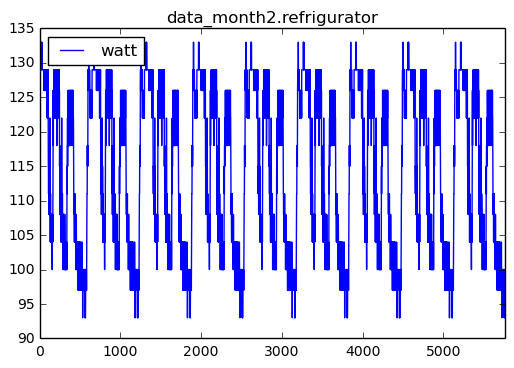

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  


query = "SELECT watt FROM data_month2.refrigurator WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[5760-1])
# query = "SELECT watt FROM device.refrigurator WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
df = pd.read_sql(query, conn)
fig, ax = plt.subplots()
ax.set_title('data_month2.refrigurator')
df.plot(ax=ax )
plt.show()
